## 1. Experiment-1

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from scipy.signal import wiener


originalImage = cv2.imread("image.jpg",0)

## 1.1 Apply gaussian noise on the given image

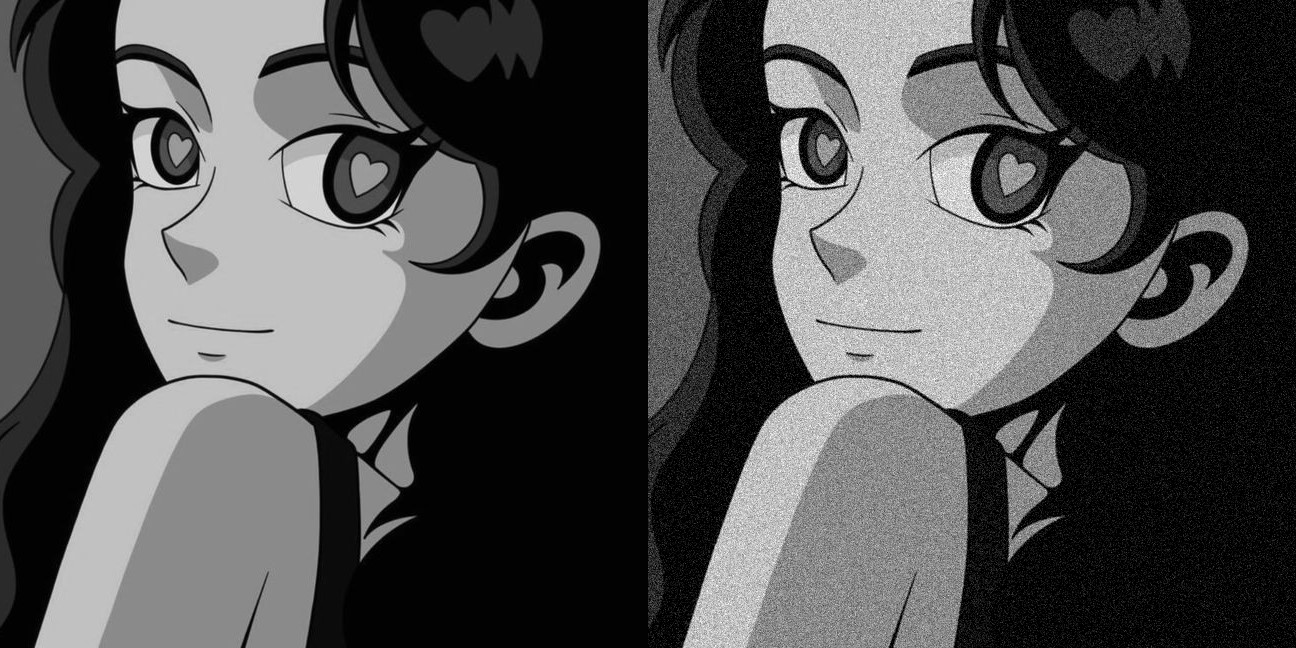

In [ ]:
gauss = np.random.normal(0, 20, originalImage.shape)  # mean, std, dimenstions

gaussianImage = originalImage + gauss
gaussianImage[gaussianImage < 0] = 0
gaussianImage[gaussianImage > 255] = 255

stackedImages = np.hstack((originalImage, gaussianImage))
cv2_imshow(stackedImages)

## 1.2 Apply adaptive wiener filter

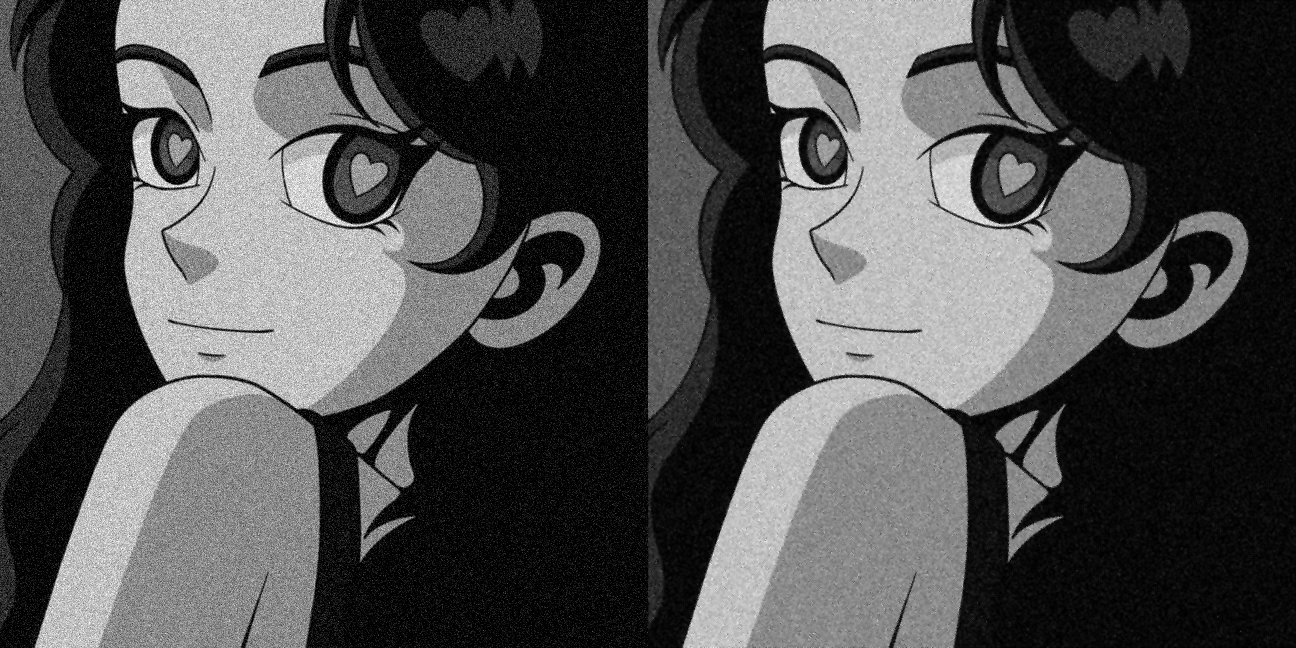

In [ ]:
wienerImage = wiener(gaussianImage, (3, 3))

stackedImages = np.hstack((gaussianImage, wienerImage))
cv2_imshow(stackedImages)

## 1.3 arithmetic mean filter

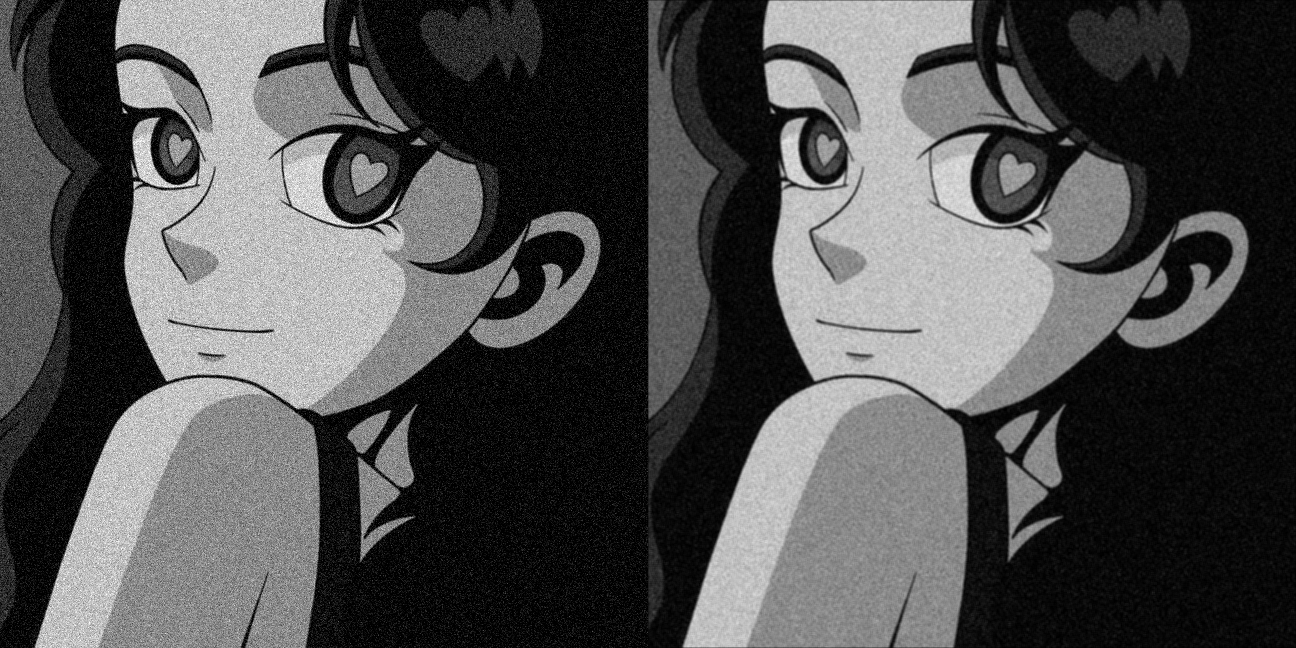

In [ ]:
imageWithPadding= cv2.copyMakeBorder(gaussianImage,1,1,1,1,0,(0,0,0)) 

originalWidth, originalHeight = gaussianImage.shape
paddingWidth, paddingHeight = imageWithPadding.shape
  
mask = np.ones([3, 3])
mask = mask / 9
averagedImage = np.zeros([originalWidth,originalWidth])
for i in range(1, paddingWidth-1):
    for j in range(1, paddingHeight-1):
        average = imageWithPadding[i-1, j-1]*mask[0, 0]+imageWithPadding[i-1, j]*mask[0, 1]+imageWithPadding[i-1, j + 1]*mask[0, 2]+imageWithPadding[i, j-1]*mask[1, 0]+ imageWithPadding[i, j]*mask[1, 1]+imageWithPadding[i, j + 1]*mask[1, 2]+imageWithPadding[i + 1, j-1]*mask[2, 0]+imageWithPadding[i + 1, j]*mask[2, 1]+imageWithPadding[i + 1, j + 1]*mask[2, 2]
        
        averagedImage[i-1, j-1] = average

stackedImages = np.hstack((gaussianImage, averagedImage))
cv2_imshow(stackedImages)

## 1.4 Apply median filter

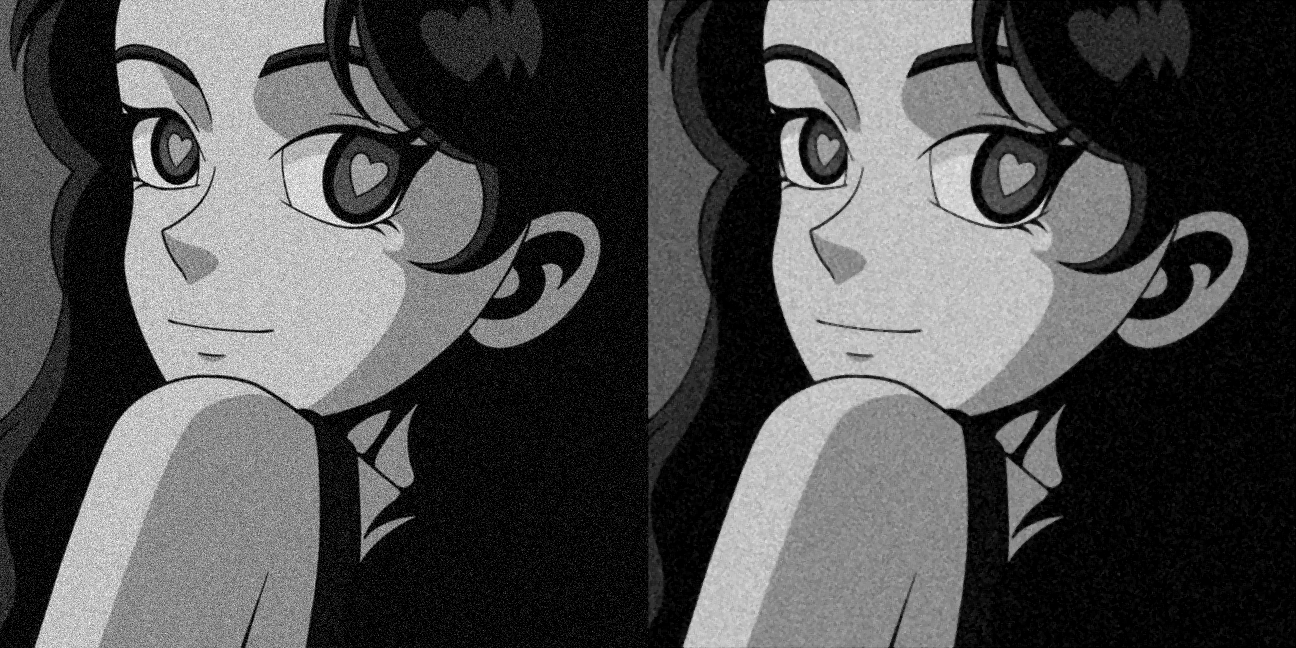

In [ ]:
medianImage = np.zeros([originalWidth, originalHeight])

for i in range(1, paddingWidth-1):
    for j in range(1, paddingHeight-1):
        numbers = [imageWithPadding[i-1, j-1],
                  imageWithPadding[i-1, j],
                  imageWithPadding[i-1, j + 1],
                  imageWithPadding[i, j-1],
                  imageWithPadding[i, j],
                  imageWithPadding[i, j + 1],
                  imageWithPadding[i + 1, j-1],
                  imageWithPadding[i + 1, j],
                  imageWithPadding[i + 1, j + 1]]
         
        numbers = np.sort(numbers)
        medianImage[i-1, j-1]= numbers[4]

stackedImages = np.hstack((gaussianImage, medianImage))
cv2_imshow(stackedImages)

## 1.5 Apply max filter

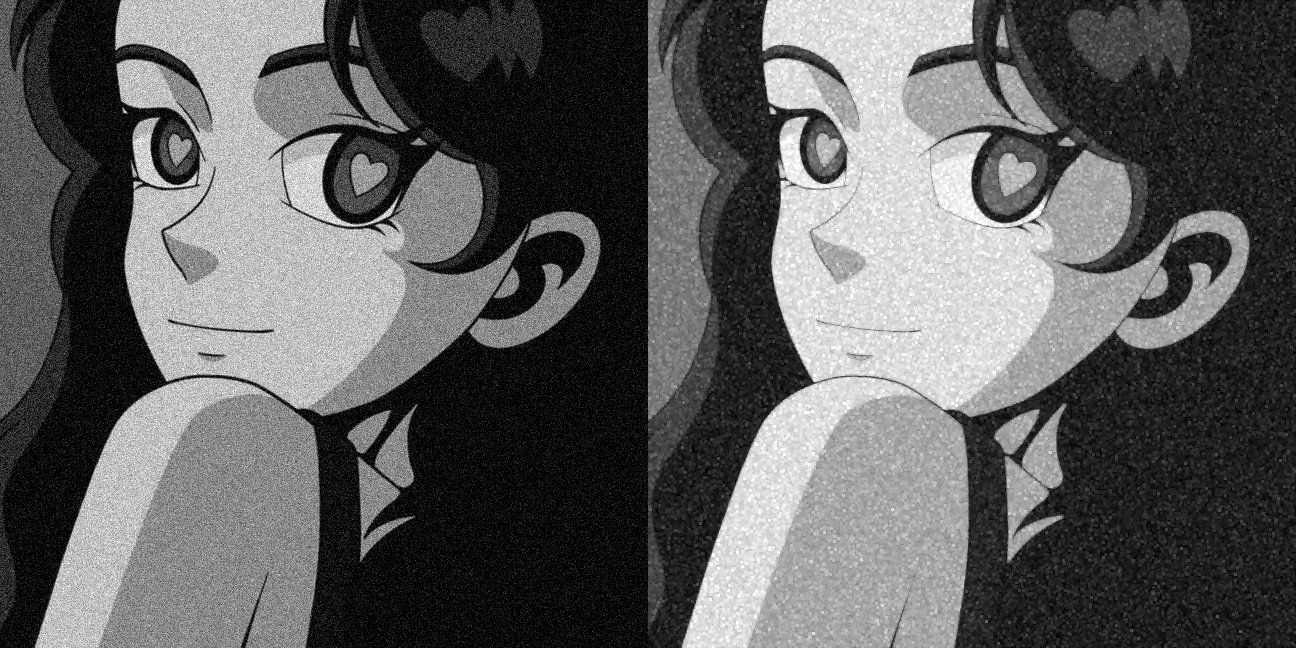

In [ ]:
maxImage = np.zeros([originalWidth,originalWidth])
for i in range(1, paddingWidth-1):
    for j in range(1, paddingHeight-1):
        max = [imageWithPadding[i-1, j-1],
                  imageWithPadding[i-1, j],
                  imageWithPadding[i-1, j + 1],
                  imageWithPadding[i, j-1],
                  imageWithPadding[i, j],
                  imageWithPadding[i, j + 1],
                  imageWithPadding[i + 1, j-1],
                  imageWithPadding[i + 1, j],
                  imageWithPadding[i + 1, j + 1]]
        max = np.sort(max)[8]
        maxImage[i-1, j-1] = max


stackedImages = np.hstack((gaussianImage, maxImage))
cv2_imshow(stackedImages)

## 1.6 Apply min filter

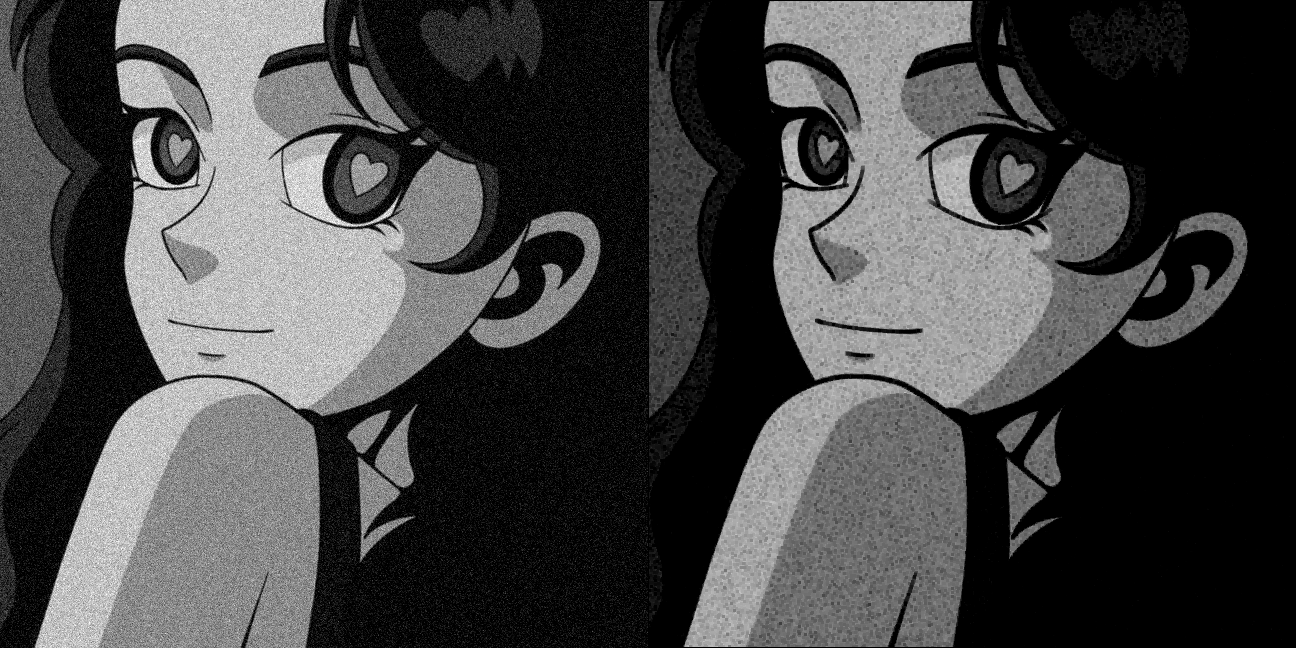

In [ ]:
minImage = np.zeros([originalWidth,originalWidth])
for i in range(1, paddingWidth-1):
    for j in range(1, paddingHeight-1):
        min = [imageWithPadding[i-1, j-1],
                  imageWithPadding[i-1, j],
                  imageWithPadding[i-1, j + 1],
                  imageWithPadding[i, j-1],
                  imageWithPadding[i, j],
                  imageWithPadding[i, j + 1],
                  imageWithPadding[i + 1, j-1],
                  imageWithPadding[i + 1, j],
                  imageWithPadding[i + 1, j + 1]]
        min = np.sort(min)[0]
        minImage[i-1, j-1] = min


stackedImages = np.hstack((gaussianImage, minImage))
cv2_imshow(stackedImages)